### Base Learner 6c  - Reporduce Normalize experiment

In [1]:
from fastai2.vision.all import *
import sys, torch
sys.path.append('..')

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# %load_ext autoreload
# %autoreload 2

from modules.expbuilder import default_params, run_exp, rm_test_recorder

train_path = Path('../../../rf-chess-data/cropped_v1/')
train_clean_path = Path('../../../rf-chess-data/cropped_v1.1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

In [2]:
my_params = {'_train_seed':0, '_custom_crop': 'my-top-crop', 
             '_model_arch': resnet50,
            '_train_path':train_clean_path,
            'rm_norm': False,
            }
default_params.update(my_params)

In [3]:
set_seed(42)

In [4]:
train_dl, learn = run_exp(default_params, 'dummy', b_ret=True,
                          b_testset_logger=False )

In [5]:
pipe0 = learn.dls[0].after_batch

pipe0_prime = Pipeline()
pipe0_prime.add(pipe0[0])
pipe0_prime.add(pipe0[1])
pipe0_prime.add(pipe0[2])

learn.dls[0].after_batch = pipe0_prime
learn.dls[1].after_batch = pipe0_prime
learn.dls[2].after_batch = pipe0_prime

##### w/o Normalize

In [5]:
set_seed(42)
with learn.no_logging(): learn.fit_one_cycle(10)

In [6]:
pd.DataFrame(learn.cbs[3].values)

,0,1,2,3
0,1.642789,0.500000,0.929825,0.557018
1,1.427014,0.627193,0.916667,0.710526
2,1.135178,0.675439,0.951754,0.719298
3,1.033293,0.692982,0.960526,0.750000
4,1.036367,0.706140,0.969298,0.758772
5,0.925820,0.736842,0.973684,0.780702
6,0.924357,0.732456,0.960526,0.776316
7,0.836314,0.741228,0.973684,0.780702
8,0.866296,0.732456,0.969298,0.776316
9,0.846266,0.741228,0.969298,0.789474


In [7]:
set_seed(42)
with learn.no_logging(): learn.fine_tune(20)

In [8]:
saved_tsrecorder = learn.cbs.pop(3)

In [9]:
learn.cbs

(#3) [TrainEvalCallback,Recorder,ProgressCallback]

In [10]:
easy_test_dl = learn.dls.test_dl(get_image_files(test_path_easy), 
                                 with_labels=True)

interp = ClassificationInterpretation.from_learner(learn, 
                                                  dl = easy_test_dl)

interp.print_classification_report()

              precision    recall  f1-score   support

black-bishop       1.00      1.00      1.00        14
  black-king       0.92      1.00      0.96        11
black-knight       0.92      1.00      0.96        12
  black-pawn       1.00      0.88      0.93        16
 black-queen       1.00      0.69      0.82        13
  black-rook       0.75      1.00      0.86        12
white-bishop       1.00      0.92      0.96        12
  white-king       1.00      0.93      0.96        14
white-knight       0.94      1.00      0.97        15
  white-pawn       1.00      1.00      1.00        15
 white-queen       0.93      1.00      0.97        14
  white-rook       1.00      1.00      1.00        14

    accuracy                           0.95       162
   macro avg       0.96      0.95      0.95       162
weighted avg       0.96      0.95      0.95       162



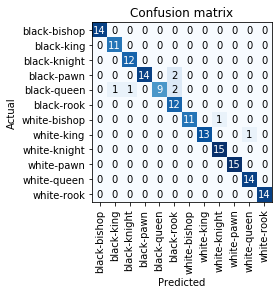

In [11]:
interp.plot_confusion_matrix()

In [14]:
learn.add_cb(saved_tsrecorder)

In [15]:
learn.cbs

(#4) [TrainEvalCallback,Recorder,ProgressCallback,TestSetRecorder]

In [16]:
with learn.no_logging(): learn.fine_tune(5)

In [20]:
ret = learn.cbs[3]

In [22]:
pd.DataFrame(ret.values).iloc[-10:,:]

,0,1,2,3
27,0.414609,0.899123,0.995614,0.903509
28,0.383777,0.907895,1.000000,0.912281
29,0.426165,0.894737,0.995614,0.899123
30,0.388532,0.899123,0.995614,0.903509
31,0.376068,0.890351,0.973684,0.929825
32,0.514063,0.885965,0.995614,0.894737
33,0.884664,0.771930,0.973684,0.802632
34,0.328582,0.894737,0.991228,0.912281
35,0.481955,0.846491,0.982456,0.868421
36,0.421793,0.877193,0.991228,0.890351


In [23]:
with learn.no_logging(): learn.fine_tune(5)

In [24]:
pd.DataFrame(learn.cbs[3].values).iloc[-15:,:]

,0,1,2,3
28,0.383777,0.907895,1.000000,0.912281
29,0.426165,0.894737,0.995614,0.899123
30,0.388532,0.899123,0.995614,0.903509
31,0.376068,0.890351,0.973684,0.929825
32,0.514063,0.885965,0.995614,0.894737
33,0.884664,0.771930,0.973684,0.802632
34,0.328582,0.894737,0.991228,0.912281
35,0.481955,0.846491,0.982456,0.868421
36,0.421793,0.877193,0.991228,0.890351
37,0.477216,0.885965,0.986842,0.899123


In [25]:
with learn.no_logging(): learn.fine_tune(10)

In [26]:
pd.DataFrame(learn.cbs[3].values).iloc[-25:,:]

,0,1,2,3
29,0.426165,0.894737,0.995614,0.899123
30,0.388532,0.899123,0.995614,0.903509
31,0.376068,0.890351,0.973684,0.929825
32,0.514063,0.885965,0.995614,0.894737
33,0.884664,0.771930,0.973684,0.802632
34,0.328582,0.894737,0.991228,0.912281
35,0.481955,0.846491,0.982456,0.868421
36,0.421793,0.877193,0.991228,0.890351
37,0.477216,0.885965,0.986842,0.899123
38,0.488189,0.885965,0.991228,0.894737
